In [1]:
import matplotlib.pyplot as plt
import torch
from src.utils import interp1d, truncate_curve

In [2]:
def func_a(alpha_):
    return torch.sin(alpha_) * 0. + 40 / 100


def func_b(alpha_):
    return torch.sin(alpha_) * 0. + 70 / 100

In [10]:
alpha = torch.linspace(0, torch.pi, 100, requires_grad=True)
a = func_a(alpha)
b = func_b(alpha)
da = torch.autograd.grad(a.sum(), alpha)[0]
db = torch.autograd.grad(b.sum(), alpha)[0]

# remove grad
a = a.detach()
b = b.detach()
alpha = torch.linspace(0, torch.pi, 100, requires_grad=False)

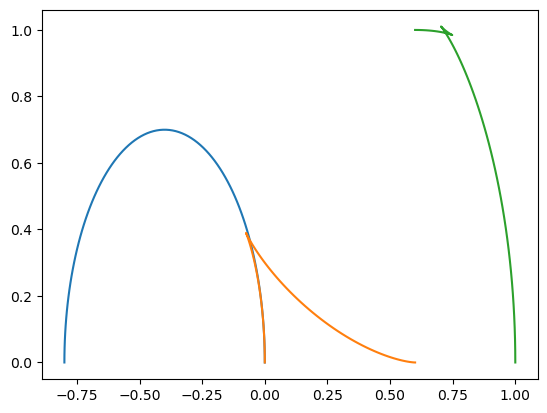

In [27]:
# curve p
xp = func_a(alpha) * (torch.cos(alpha) - 1)
yp = func_b(alpha) * torch.sin(alpha)

# curve u
c = a - b
dc = da - db
xu = 2 * torch.sin(alpha / 2) ** 2 * (torch.cos(alpha) * c + torch.sin(alpha) * dc)
yu = -4 * torch.cos(alpha / 2) ** 2 * torch.sin(alpha / 2) * (torch.cos(alpha / 2) * c + torch.sin(alpha / 2) * dc)

# curve v
xv = xu + torch.cos(alpha / 2)
yv = yu + torch.sin(alpha / 2)

plt.plot(xp, yp)
plt.plot(xu, yu)
plt.plot(xv, yv)

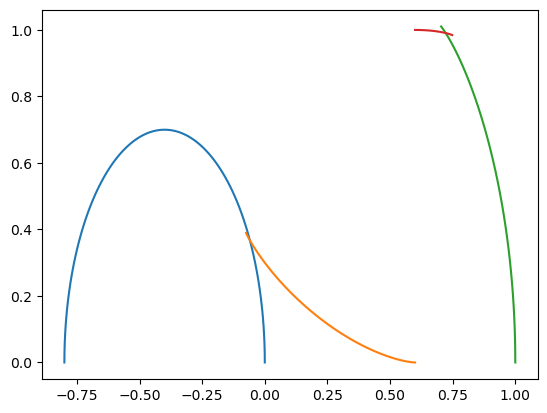

In [33]:
# outer branch of u
corner = torch.argmax(yu)
xu_outer, yu_outer = truncate_curve(xu.unsqueeze(0), yu.unsqueeze(0), torch.tensor([corner]), keep_right=True)
xu_outer, yu_outer = xu_outer[0], yu_outer[0]

# two branches of v
corner1 = torch.where(xv[1:] - xv[:-1] > 0)[0]
corner1 = corner1[0] if len(corner1) > 0 else len(xv) - 1
corner2 = torch.argmax(xv[corner1:])
xv1 = xv[:corner1 + 1]
yv1 = yv[:corner1 + 1]
xv2 = xv[corner1:][corner2:]
yv2 = yv[corner1:][corner2:]

plt.plot(xp, yp)
plt.plot(xu_outer, yu_outer)
plt.plot(xv1, yv1)
plt.plot(xv2, yv2)


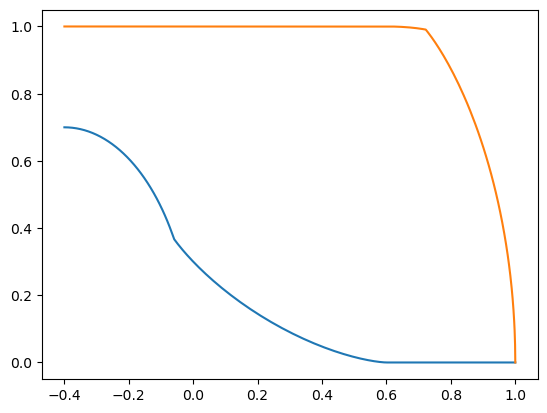

In [21]:
# bottom
x_sample = torch.linspace(-func_a(torch.tensor(torch.pi / 2)), 1., 2000)
y_sample_p = interp1d(xp.unsqueeze(0), yp.unsqueeze(0), x_sample.unsqueeze(0), x0_descending=True)[0]
y_sample_u = interp1d(xu.unsqueeze(0), yu.unsqueeze(0), x_sample.unsqueeze(0), x0_descending=False)[0]
y_sample_lower = torch.maximum(y_sample_p, y_sample_u)


# top
y_sample_v1 = interp1d(xv1.unsqueeze(0), yv1.unsqueeze(0), x_sample.unsqueeze(0), outside_value=1., x0_descending=True)[0]
y_sample_v2 = interp1d(xv2.unsqueeze(0), yv2.unsqueeze(0), x_sample.unsqueeze(0), outside_value=1., x0_descending=True)[0]
y_sample_upper = torch.minimum(y_sample_v1, y_sample_v2)

plt.plot(x_sample, y_sample_lower)
plt.plot(x_sample, y_sample_upper)

(tensor([0, 0, 1, 1]), tensor([1, 2, 0, 2]))